In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_info = pd.read_csv("Data/rt.movie_info.tsv",sep='\t')
financial_data = pd.read_csv("combined_movie_data.csv")
ratings_data =pd.read_csv("Data/tmdb.movies.csv",index_col=[0])

In [3]:
movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
financial_data.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [6]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1086 non-null   object 
 4   year               1247 non-null   int64  
 5   id                 1247 non-null   int64  
 6   release_date       1247 non-null   object 
 7   production_budget  1247 non-null   object 
 8   domestic_gross_y   1247 non-null   object 
 9   worldwide_gross    1247 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 97.6+ KB


In [7]:
ratings_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
# subset movie info
movie_info = movie_info[['genre','director','writer','studio']]
movie_info.head()

,genre,director,writer,studio
0,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,NaN
3,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,NaN
4,Drama|Romance,Rodney Bennett,Giles Cooper,NaN


In [9]:
# subset financial data
financial_data = financial_data[["title","studio","year","production_budget","worldwide_gross"]]
financial_data.head()

,title,studio,year,production_budget,worldwide_gross
0,Toy Story 3,BV,2010,"$200,000,000","$1,068,879,522"
1,Inception,WB,2010,"$160,000,000","$835,524,642"
2,Shrek Forever After,P/DW,2010,"$165,000,000","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,2010,"$68,000,000","$706,102,828"
4,Iron Man 2,Par.,2010,"$170,000,000","$621,156,389"


In [10]:
# subset ratings data
ratings_data = ratings_data[['popularity','title','vote_average','vote_count']]
ratings_data.head()

,popularity,title,vote_average,vote_count
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,How to Train Your Dragon,7.7,7610
2,28.515,Iron Man 2,6.8,12368
3,28.005,Toy Story,7.9,10174
4,27.920,Inception,8.3,22186


In [11]:
finance_ratings_df = pd.merge(
    financial_data,
    ratings_data,
    on='title',
    how='inner'
)
finance_ratings_df.head()

,title,studio,year,production_budget,worldwide_gross,popularity,vote_average,vote_count
0,Toy Story 3,BV,2010,"$200,000,000","$1,068,879,522",24.445,7.7,8340
1,Inception,WB,2010,"$160,000,000","$835,524,642",27.920,8.3,22186
2,Shrek Forever After,P/DW,2010,"$165,000,000","$756,244,673",15.041,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,2010,"$68,000,000","$706,102,828",20.340,6.0,4909
4,Iron Man 2,Par.,2010,"$170,000,000","$621,156,389",28.515,6.8,12368


In [12]:
# cleaning numeric columns
finance_ratings_df['production_budget'] = finance_ratings_df['production_budget'].replace('[\$,]', '', regex=True).astype(int)
finance_ratings_df['worldwide_gross'] = finance_ratings_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
finance_ratings_df['profit'] = finance_ratings_df['worldwide_gross'] - finance_ratings_df['production_budget']
finance_ratings_df.head()

,title,studio,year,production_budget,worldwide_gross,popularity,vote_average,vote_count,profit
0,Toy Story 3,BV,2010,200000000,1068879522,24.445,7.7,8340,868879522
1,Inception,WB,2010,160000000,835524642,27.920,8.3,22186,675524642
2,Shrek Forever After,P/DW,2010,165000000,756244673,15.041,6.1,3843,591244673
3,The Twilight Saga: Eclipse,Sum.,2010,68000000,706102828,20.340,6.0,4909,638102828
4,Iron Man 2,Par.,2010,170000000,621156389,28.515,6.8,12368,451156389


In [13]:
merged_movie_info = finance_ratings_df.merge(movie_info, on='studio', how='left')
merged_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2472 non-null   object 
 1   studio             1406 non-null   object 
 2   year               2472 non-null   int64  
 3   production_budget  2472 non-null   int64  
 4   worldwide_gross    2472 non-null   int64  
 5   popularity         2472 non-null   float64
 6   vote_average       2472 non-null   float64
 7   vote_count         2472 non-null   int64  
 8   profit             2472 non-null   int64  
 9   genre              1369 non-null   object 
 10  director           1232 non-null   object 
 11  writer             1028 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 231.9+ KB


In [14]:
merged_movie_info.isnull().sum()

title                   0
studio               1066
year                    0
production_budget       0
worldwide_gross         0
popularity              0
vote_average            0
vote_count              0
profit                  0
genre                1103
director             1240
writer               1444
dtype: int64

In [15]:
merged_movie_info.duplicated().value_counts()

False    2302
True      170
Name: count, dtype: int64

In [16]:
merged_movie_info = merged_movie_info.drop_duplicates()

In [17]:
merged_movie_info.dropna(subset=['genre','director','writer','studio'],inplace=True)

In [18]:
merged_movie_info.head(25)

,title,studio,year,production_budget,worldwide_gross,popularity,vote_average,vote_count,profit,genre,director,writer
1,Inception,WB,2010,160000000,835524642,27.920,8.3,22186,675524642,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,2010,155000000,418186950,17.382,6.3,3196,263186950,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...
30,Gulliver's Travels,Fox,2010,112000000,232017848,10.768,5.1,1282,120017848,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...
34,Due Date,WB,2010,65000000,211739043,12.445,6.3,2973,146739043,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland
36,Yogi Bear,WB,2010,80000000,204774690,9.096,5.3,387,124774690,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland
39,The A-Team,Fox,2010,110000000,177241171,17.097,6.3,2703,67241171,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...
41,Unstoppable,Fox,2010,95000000,165720921,14.010,6.4,1913,70720921,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...
42,Unstoppable,Fox,2010,95000000,165720921,0.600,1.6,4,70720921,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...
43,The Book of Eli,WB,2010,80000000,158750817,18.985,6.7,3495,78750817,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland
44,The Town,WB,2010,37000000,152566881,13.476,7.1,2386,115566881,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland


In [19]:
# Calculate Total Profit per Director
director_total_profit = merged_movie_info.groupby('director')['profit'].sum().sort_values(ascending=False).reset_index()
# Calculate Average Profit per Director
director_avg_profit = merged_movie_info.groupby('director')['profit'].mean().sort_values(ascending=False).reset_index()
director_total_profit

,director,profit
0,Gary Wheeler,19040214394
1,Clint Eastwood,14785304886
2,John Krasinski,450310503
3,Trey Edward Shults,256905443
4,Bryan Singer,193559272
5,George Hickenlooper,193559272
6,Jim Jarmusch,193559272
7,Joan Chen,193559272
8,Peter Webber,193559272
9,Sam Mendes,193559272


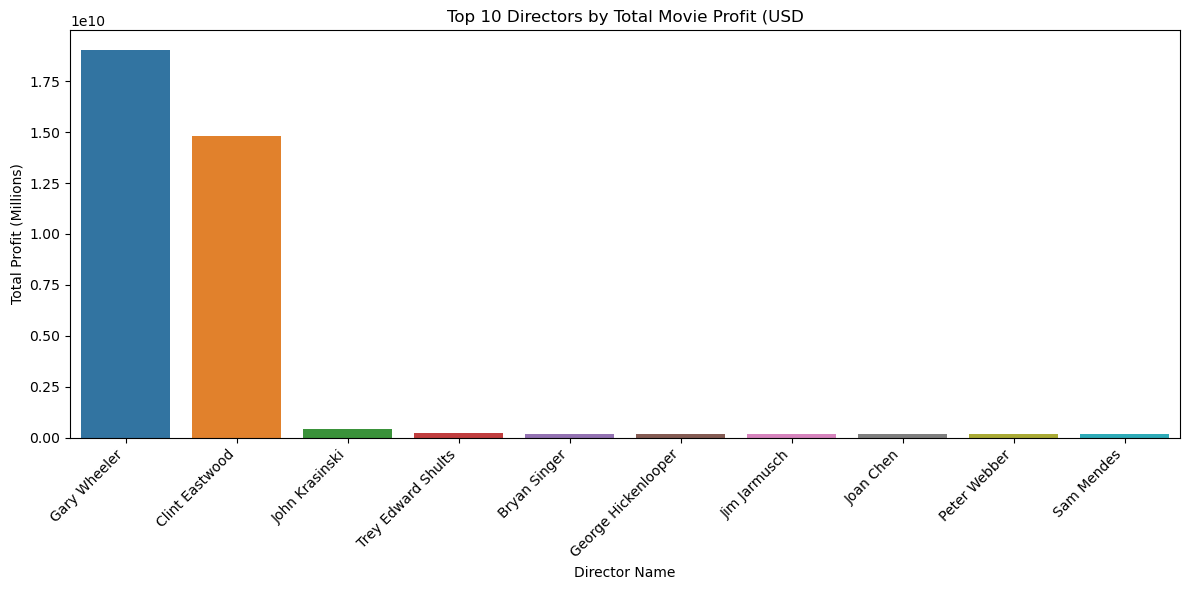

In [20]:
# Select the Top 10 Directors by Total Profit
top_10_directors = director_total_profit.head(10)

plt.figure(figsize=(12, 6))
# Using seaborn 
sns.barplot(x='director', y='profit', data=top_10_directors)

plt.title('Top 10 Directors by Total Movie Profit (USD')
plt.xlabel('Director Name')
plt.ylabel('Total Profit (Millions)')
plt.xticks(rotation=45, ha='right') # Rotate names to prevent overlap
plt.tight_layout()
plt.show()

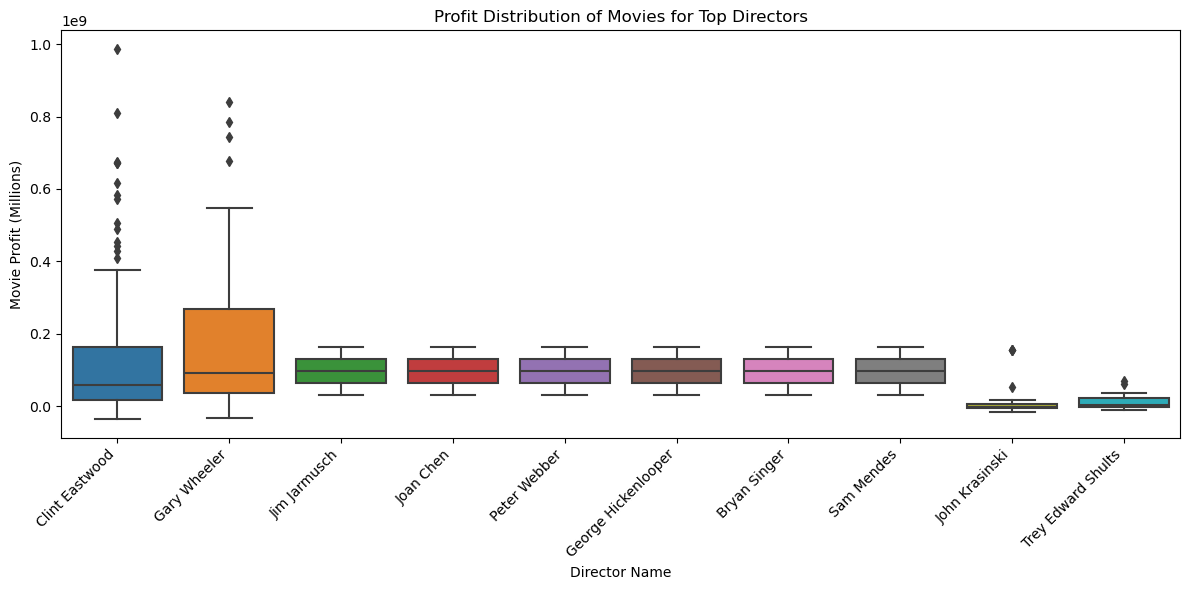

In [21]:
top_directors_list = top_10_directors['director'].tolist()
filtered_df = merged_movie_info[merged_movie_info['director'].isin(top_directors_list)]
# boxplot measures Distribution/Risk. 
# It shows the typical (median) profit and the spread of results.
plt.figure(figsize=(12, 6))
sns.boxplot(x='director', y='profit', data=filtered_df)

plt.title('Profit Distribution of Movies for Top Directors')
plt.xlabel('Director Name')
plt.ylabel('Movie Profit (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

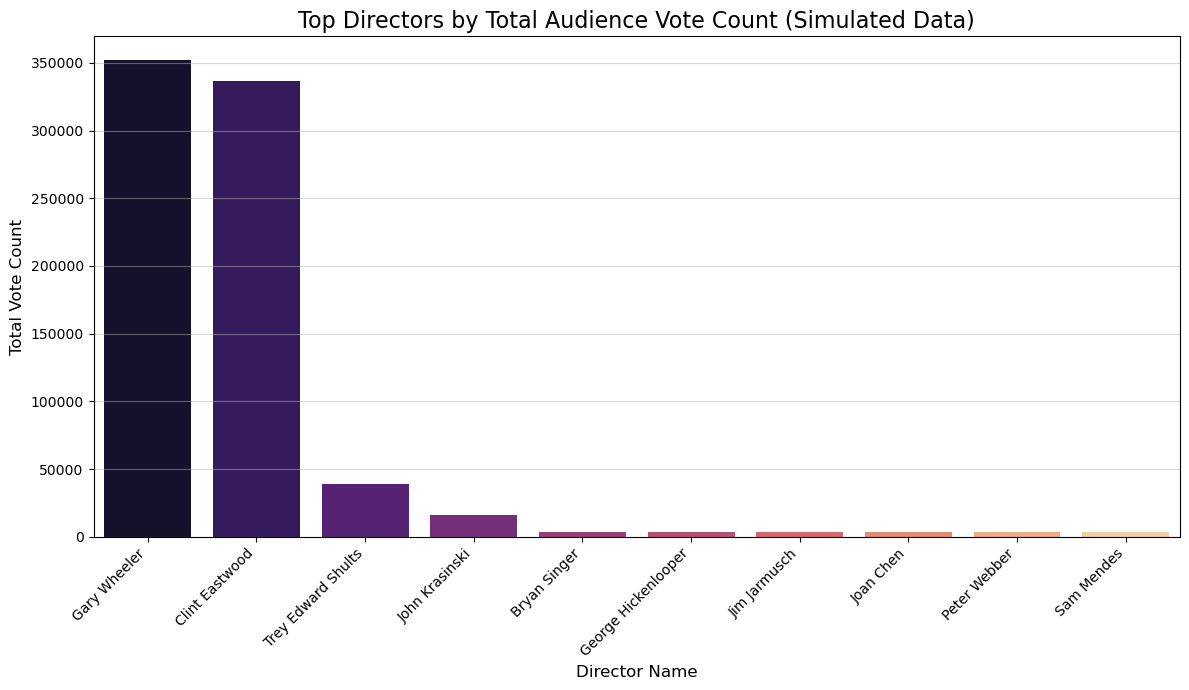

In [22]:
# Group by director and sum the total vote count, then sort
director_total_votes = merged_movie_info.groupby('director')['vote_count'].sum().sort_values(ascending=False).reset_index()
director_total_votes.columns = ['Director Name', 'Total Vote Count']

# Select the top directors
top_directors_votes = director_total_votes.head(10)

# Bar Chart for Top Directors by Total Vote Count
plt.figure(figsize=(12, 7))

sns.barplot(x='Director Name', y='Total Vote Count', data=top_directors_votes, palette='magma')

plt.title('Top Directors by Total Audience Vote Count (Simulated Data)', fontsize=16)
plt.xlabel('Director Name', fontsize=12)
plt.ylabel('Total Vote Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
